## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'


In [4]:
# Make sure that you load the new packages from lecture if needed
!conda install -y lxml beautifulsoup4 html5lib
!conda install -y openpyxl xlrd
!conda install -y requests

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - beautifulsoup4
    - html5lib
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aws-c-auth-0.9.0           |       h79febb2_2         104 KB
    aws-c-cal-0.9.2            |       hd08b81e_1          40 KB  conda-forge
    aws-c-common-0.12.4        |       h6caf38d_0         216 KB  conda-forge
    aws-c-compression-0.3.1    |       habbe1e8_6          21 KB  conda-forge
    aws-c-event-stream-0.5.6   |       hd40f934_1          51 KB  conda-forge
    aws-c-http-0.10.4          |       he1481

### You Try - 3 Warm-Up Problems From Lecture

Here is a file that does not just read in nicely. See if you can use optional arguments to read it in.

*Hint* How many (and which) rows of this data are just junk?

**Terminal Command Line:**

The command

        cat data/ex4.csv

if typed into a terminal prints out the contents of the file line by line. This lets us take a quick look at what is in the file. BEWARE - if you do this with a large file it will take a long time to print! Another great command is:

        head data/ex4.csv

would just show the first 10 lines of the file!

In [8]:
# This code lets you look at the data
# the terminal command "cat" - prints the contents of a file
# when we do !cat filename we can look at the 
file_name = 'data/ex4.csv'
!cat data/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [ ]:
# Your code here

------------------------------------------------------

In [ ]:
# EXAMPLES - DICTIONARY TO PANDAS
my_dict = {"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": None,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
my_dict

In [ ]:
for key in my_dict.keys():
    print(key)
    print(my_dict[key])
    print('----------')

In [ ]:
# This code will give you an error
df = pd.DataFrame(my_dict)
df

In [ ]:
# This code will work
df = pd.DataFrame(my_dict['siblings'])
df

### You Try:

Can you explain what is going on in the examples above? Why does one give an error and the other works? What specifically is it about focusing in on the siblings data that allows pandas to read this?

**Your explanation here:**

---------------------------------------

### You Try

Here is an example website that contains a table:

https://www.scrapethissite.com/pages/forms/

1. Open the website in your browser. Does the page that appears contain ALL the data about hockey teams?
2. How does the web address change when you select the second page of the website.
3. See if you can write code that will scrape all of the data. HINT: I would use a for loop that updates the web address and appends the new table to a list.
4. Once you have the list of tables can you get them into a single data frame and save the data as a .csv?

In [10]:
# Here is how I could get one page
website = 'https://www.scrapethissite.com/pages/forms/'
tables = pd.read_html(website)
len(tables)

tables

[                Team Name  Year  Wins  Losses  OT Losses  Win %  \
 0           Boston Bruins  1990    44      24        NaN  0.550   
 1          Buffalo Sabres  1990    31      30        NaN  0.388   
 2          Calgary Flames  1990    46      26        NaN  0.575   
 3      Chicago Blackhawks  1990    49      23        NaN  0.613   
 4       Detroit Red Wings  1990    34      38        NaN  0.425   
 5         Edmonton Oilers  1990    37      37        NaN  0.463   
 6        Hartford Whalers  1990    31      38        NaN  0.388   
 7       Los Angeles Kings  1990    46      24        NaN  0.575   
 8   Minnesota North Stars  1990    27      39        NaN  0.338   
 9      Montreal Canadiens  1990    39      30        NaN  0.487   
 10      New Jersey Devils  1990    32      33        NaN  0.400   
 11     New York Islanders  1990    25      45        NaN  0.312   
 12       New York Rangers  1990    36      31        NaN  0.450   
 13    Philadelphia Flyers  1990    33      37  

In [ ]:
# Your code here
#1. Open the website in your browser. Does the page that appears contain ALL the data about hockey teams?

#When I open the website in my web browser I see a table and pages to look at. So no, the page that appears does NOT contain
#all the data about hocket teams?

In [ ]:
#2. How does the web address change when you select the second page of the website.

#When you go from page 1 to page 2, 3, 4, 5, .... 23 the only thing that changes is the page
#number in the website. For example, this is the link https://www.scrapethissite.com/pages/forms/?page_num=1, and 
#what changes when I move from page 1.2.3 is /?page_num=1,2,3. 

In [12]:
#3. See if you can write code that will scrape all of the data. HINT: I would use a for loop that updates
#the web address and appends the new table to a list.
df_list = []
#There are 24 pages in the website and we must loop through all 
website = 'https://www.scrapethissite.com/pages/forms/'
website24 ='https://www.scrapethissite.com/pages/forms/?page_num=23'

for pg in range(1,24):
    url = f"{website}?page_num={pg}"
    tables = pd.read_html(url)
    hockey_page = tables[0]
    df_list.append(hockey_page)


#This code scraped 24 pages on the website by slightly adjusting the url. The data is then put on
# a list

------------------------------------------------

In [16]:
#4. Once you have the list of tables can you get them into a single data frame and save the data as a .csv?
#I use concat to stack the different tables to get this functional. help(pd) emphasized the importance of
#ignore_index, especially since I did not want to create a new index. 
final_df = pd.concat(df_list, ignore_index=True)
final_df.to_csv('Hockey_Teams.csv')



In [18]:
#help(pd)

## Reading and Writing Data - Day3 HW

## Homework 3

Go to Kaggle Datasets: https://www.kaggle.com/datasets

Find a data set that you are interested in looking at. You are welcome to work together and choose a data set as a group! You should read in this data and do some basic statistics on the data set. Answer the following questions:

1. Tell your reader about the data: Where did you get it? When did you access it? Who owns it? What is the license? Are there any acknowledgments that you should give for using the data? All of this should be on the Kaggle page
2. How many variables and observations?
3. What type of data is contained? Was it read in as strings, ints, floats?
4. Are there any NaNs or weird data types that you can see?
5. Most Kaggle datasets contain some basic stats or visualizations on the download page. See if you can recreate some of the plots or data you see on the website.
6. Come up with at least one question of your own that you can answer by analyzing the data.
7. Create a dataframe with just the data you need to answer your question - save the data subset to a file (your choice of type)
8. **In a NEW NOTEBOOK** Write code that reads in your subset of the data, markdown that explains clearly where you got the data originally (license and references included) and the process you took to create your subset, a description of the question you are answering, and code that can reliably run and answer your question followed by words that explain your results.

------------------------------------

Your final notebooks should:

- [ ] Be completely new notebooks with just the Day3 stuff in it: First the code that creates your data and second the code that reads in the data and does the analysis. 
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [25]:
#DONT FORGET TO HAND IN YOUR DATA!!!!
import kagglehub

In [35]:

# Download latest version
path = kagglehub.dataset_download("codebynadiia/gdp-per-country-20202025")

print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /Users/jesusplascencia/.cache/kagglehub/datasets/codebynadiia/gdp-per-country-20202025/versions/1


['2020-2025.csv']

In [ ]:
#1] Tell your reader about the data: Where did you get it? When did you access it? Who owns it? What is the license? 
#Are there any acknowledgments that you should give for using the data? All of this should be on the Kaggle page.

#This data is from the kaggle datasets website. It is licensed under MIT and is
#completely free to use. This dataset contains GDP data for all recognized countries
#from 2020 to 2025. The dataset is compiled from IMF sources. This data was
#accessed on Septeber 13, 2025. This code was done by "NADDIIA" about 9 days ago.
#There are no acknowledgements described in the website, but NADIIA was
#largely credited with coding this dataset.


In [41]:
#Read in the data. 
my_path = '/Users/jesusplascencia/.cache/kagglehub/datasets/codebynadiia/gdp-per-country-20202025/versions/1/'

file = my_path+'2020-2025.csv'
df = pd.read_csv(file)
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [52]:
#2. How many variables and observations?
df.shape
df.columns

#There are 7 varibles and 196 observations.

Index(['Country', '2020', '2021', '2022', '2023', '2024', '2025'], dtype='object')

In [54]:
#3. What type of data is contained? Was it read in as strings, ints, floats?
df.info()
df.dtypes

#this data contains floats, integers, and objects. Year 2020 is an integer, 2021-2025 is a float, while country is 
#an object. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object

In [66]:
#4Are there any NaNs or weird data types that you can see?

print(df.isna().sum())
df.info
df.dtypes
#Yes there were multiple NaNs in the GDP dataset. There was also a weird data type that I noticed,
# 2020 contains values that are in integer form while 2021-2025 have floats. This inconsistency
#in whether or not to use floats/integers is somewhat weird. other than that I did not find anything 
#weird

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64


Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object

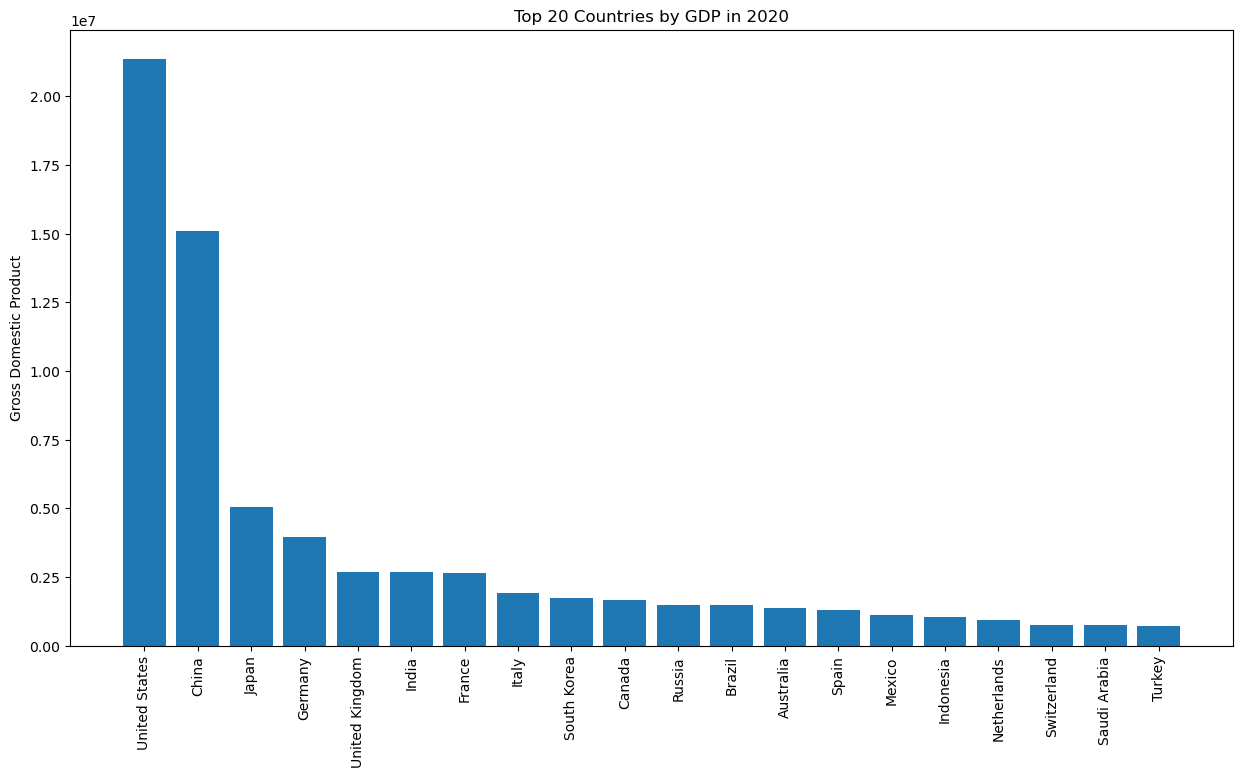

In [93]:
#5) Most Kaggle datasets contain some basic stats or visualizations on the download page.
#See if you can recreate some of the plots or data you see on the website.

#Graph for the top 20 countries by GDP in 2020
df.columns

year = '2020'
top20_2020 = df[['Country', year]].sort_values(by=year, ascending = False).head(20)

plt.figure(figsize=(15,8))
plt.bar(top20_2020['Country'], top20_2020[year])

plt.title("Top 20 Countries by GDP in 2020")
plt.ylabel("Gross Domestic Product")
plt.xticks(rotation=90)
plt.show()


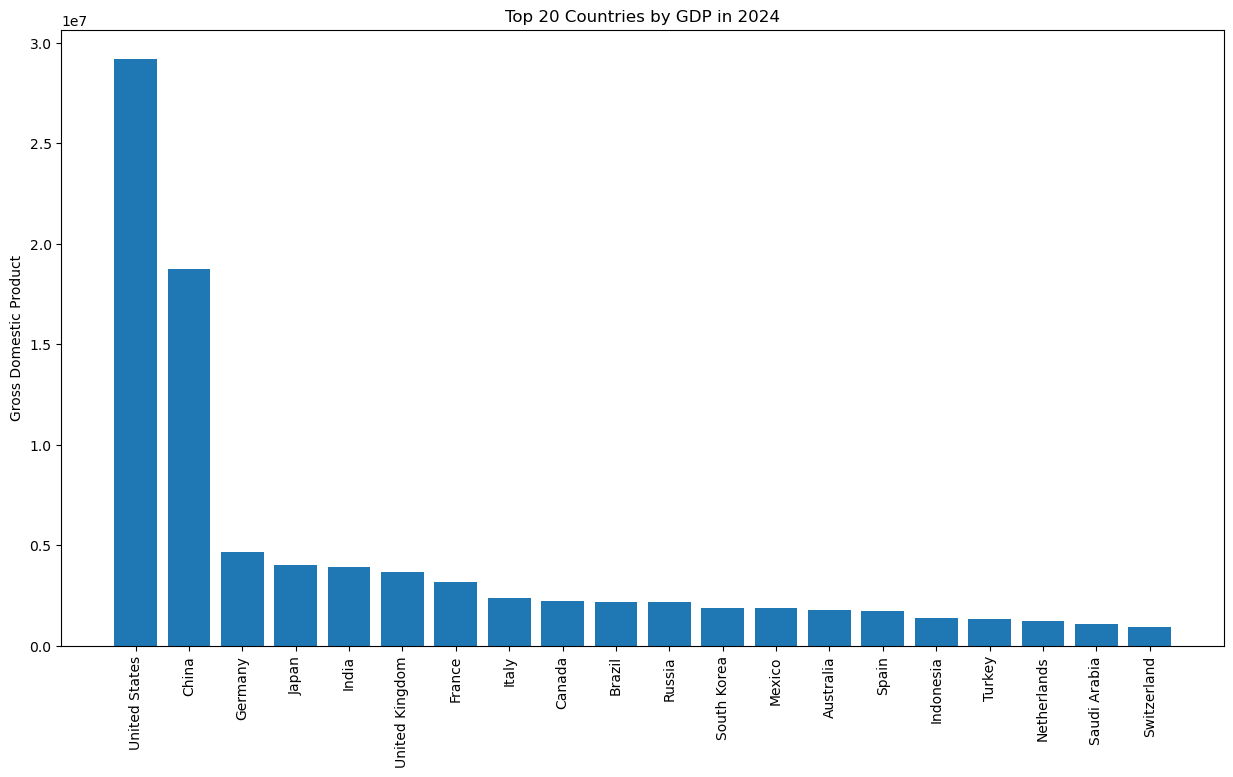

In [144]:
year = '2024'
top20_2024 = df[['Country', year]].sort_values(by=year, ascending = False).head(20)

plt.figure(figsize=(15,8))
plt.bar(top20_2024['Country'], top20_2024[year])

plt.title("Top 20 Countries by GDP in 2024")
plt.ylabel("Gross Domestic Product")
plt.xticks(rotation=90)
plt.show()

In [129]:
#6. Come up with at least one question of your own that you can answer by analyzing the data.

#Which countries were in the top 10 GDP in 2025.
colummns = ['Country','2025']
DF_top10 = df[colummns].groupby('Country').sum().sort_values('2025',ascending=False).head(10).copy()
DF_top10.to_csv('top_10_gdp.csv')



In [ ]:
#7. Create a dataframe with just the data you need to answer your question - save the data subset to a file (your choice of type)

#I saved the dataset required to answer my question as a .csv file. It shwos me the top 10 countries by GDP in 2025. I wanted to see 
#how China paried up against the U.S. in 2025 and I found surprising results. The U.S. GDP is extremely high. While it is true that China
#is second on this list, it is still not near U.S. GDP. Beyond that, Germany is 3rd on the list and its GDP is no where near the United States GDP.

In [ ]:
#My Second NoteBook is titled "Notebook2_Home"